In [66]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re
import pandas as pd
pd.options.mode.chained_assignment = None

#### Movies fetched from api: 9742 rows

In [67]:
movies = pd.read_csv("https://raw.githubusercontent.com/cardosorrenan/alura-QuarentenaDados/master/csv/movies.csv")
movies.columns = ["movie_id", "title", "genres"]

#### Reviews fetched from api: 100836 rows

In [68]:
reviews = pd.read_csv("https://raw.githubusercontent.com/cardosorrenan/alura-QuarentenaDados/master/csv/ratings.csv")
reviews.columns = ["user_id", "movie_id", "rating", "timestamp"]

#### Average movie reviews: 9724 rows

In [69]:
reviews_avg = reviews.groupby('movie_id')['rating'].mean()
reviews_avg.head()

movie_id
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: rating, dtype: float64

#### Average and film details: 9724 rows

In [70]:
movies_with_avgs = movies.join(reviews_avg, on="movie_id")
print(movies_with_avgs.shape)
movies_with_avgs.head()

(9742, 4)


,movie_id,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


#### **Day 1 - Task 1**: Find all the movies without rating

In [71]:
movies_nan_avgs = movies_with_avgs[movies_with_avgs.isna().any(axis=1)]
print(movies_nan_avgs.shape)
movies_nan_avgs.head()

(18, 4)


,movie_id,title,genres,rating
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN


####  **Day 1 - Task 3**: Find the review amount for each movie

In [72]:
count = reviews.groupby('movie_id')['movie_id'].count()
movies_count_reviews = pd.DataFrame({'movie_id': count.index, 'count': count.values}).sort_values("movie_id")
movies_count_reviews.head()

,movie_id,count
0,1,215
1,2,110
2,3,52
3,4,7
4,5,49


####  **Day 1 - Task 4**: Round the averages to 2 decimal digits


In [73]:
movies_with_avgs = movies_with_avgs.round({'rating': 2})
movies_with_avgs.head()

,movie_id,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36
4,5,Father of the Bride Part II (1995),Comedy,3.07


#### **Day 1 - Task 5**: List all genres (unique) / **Day 1 - Task 6**: Occurrences of each gender


In [74]:
movie_genres = movies['genres'].to_numpy()
genres = '|'.join(movie_genres).split('|')
genres = pd.DataFrame({'genre': genres})
genres = genres.groupby('genre')['genre'].count()
genres = genres.sort_values(ascending=False)
genres.head()

genre
Drama       4361
Comedy      3756
Thriller    1894
Action      1828
Romance     1596
Name: genre, dtype: int64

#### **Day 1 - Task 7**: Plot results of tasks 5, 6 / **Day 2 - Task 1**: Rotate the ticks of axis x


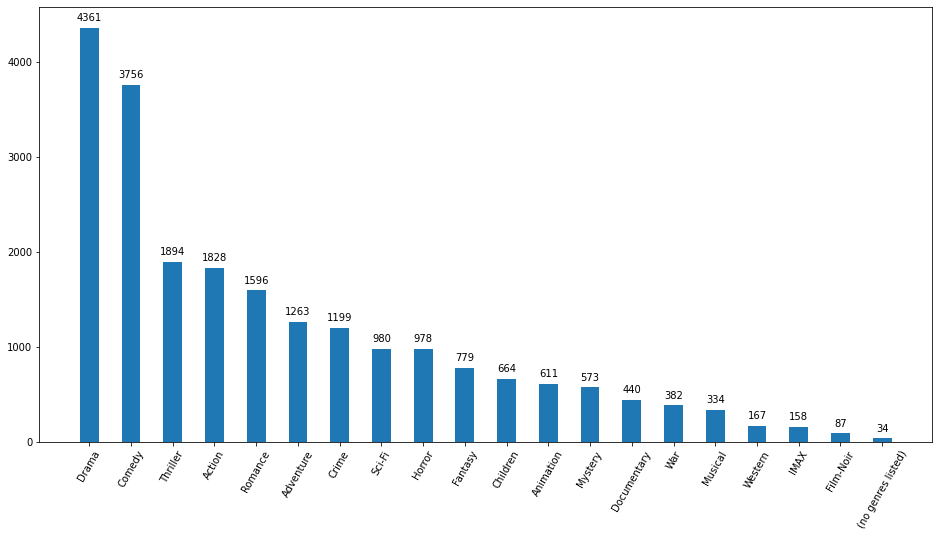

In [75]:
def plot_custom(index, values):
  fig, ax = plt.subplots()
  x = np.arange(len(index))
  ax.set_xticks(x)
  ax.set_xticklabels(index, rotation=60)
  genres_bar = ax.bar(x, values, width=0.45)

  for bar in genres_bar:
    height = bar.get_height()
    ax.annotate('{}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),
                textcoords="offset points",
                ha='center', va='bottom')
    
  plt.gcf().set_size_inches(16, 8)
  plt.show()


plot_custom(genres.index, genres.values)

#### **Day 2 - Task 2**: Boxplots of movies with approximate averages / **Day 2 - Task 4**: Set the ticks x to title film e rotate

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

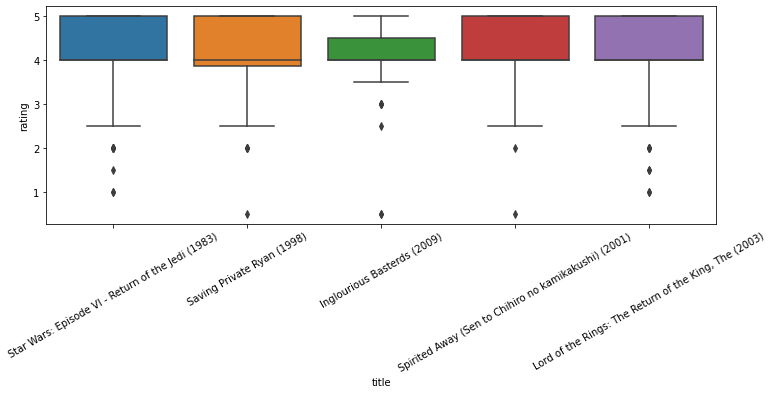

In [76]:
movies_with_count = movies_with_avgs.dropna().merge(movies_count_reviews, on='movie_id')
movies_with_count = movies_with_count.sort_values('count', ascending=False)

movie_ids = [7153, 1210, 2028, 68157, 5618]
review_approx_avgs = reviews.query(f'movie_id in {movie_ids}').merge(movies, on='movie_id')

sns.boxplot(data = review_approx_avgs, x ="title", y="rating")
plt.gcf().set_size_inches(12, 4)
plt.xticks(rotation=30)

#### **Day 2 - Task 3**: Plot the boxplot of the 10 most voted movies 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

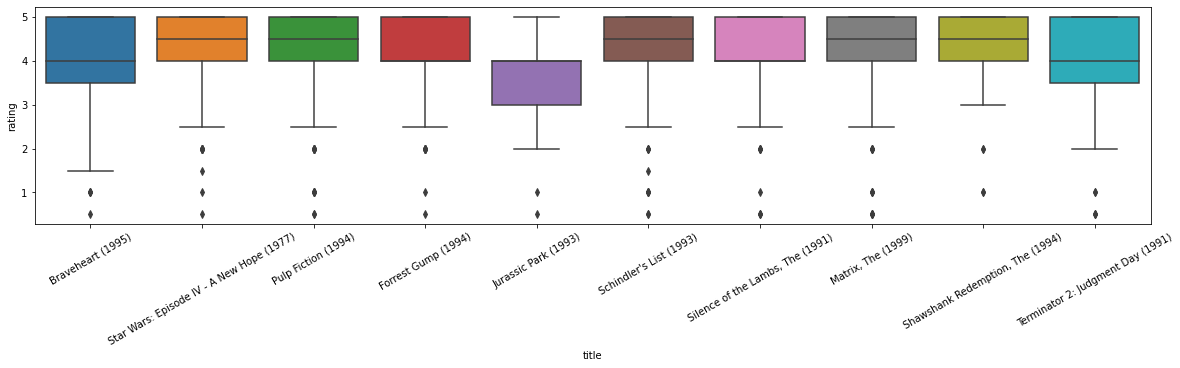

In [77]:
movie_ids_most_voted = list(movies_with_count[0:10]['movie_id'])
reviews_of_most_voted = reviews.query(f'movie_id in {movie_ids_most_voted}').merge(movies, on='movie_id')
sns.boxplot(data = reviews_of_most_voted, x ="title", y="rating")
plt.gcf().set_size_inches(20, 4)
plt.xticks(rotation=30)

#### **Day 2 - Task 5**: Calculate mode, average and median of some films (Notes close to 0.5, 3 and 5).


In [78]:
series_group_by = reviews.groupby('movie_id')['rating']

mode = series_group_by.max().rename('mode')
mean = series_group_by.mean().rename('average')
median = series_group_by.median().rename('median')

result_task = movies.join(mode, on='movie_id') 
result_task = result_task.join(mean, on='movie_id').round({'average': 2})
result_task = result_task.join(median, on='movie_id')
result_task[["movie_id", "title", "mode", "average", "median"]].head()

,movie_id,title,mode,average,median
0,1,Toy Story (1995),5.0,3.92,4.0
1,2,Jumanji (1995),5.0,3.43,3.5
2,3,Grumpier Old Men (1995),5.0,3.26,3.0
3,4,Waiting to Exhale (1995),3.0,2.36,3.0
4,5,Father of the Bride Part II (1995),5.0,3.07,3.0


#### **Day 2 - Task 6**: Plot the hist and boxplot side-by-side


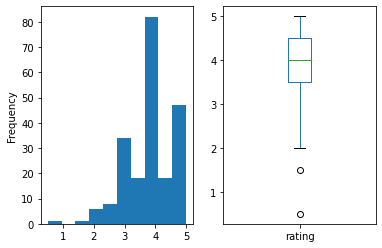

In [79]:
plt.subplot(1, 2, 1)
hist_reviews = reviews.query(f"movie_id=={1}")["rating"]
hist_reviews.plot(kind='hist')
plt.subplot(1, 2, 2)
hist_reviews.plot.box()

#### **Day 2 - Task 7**: Plot a chart with annual averages per year (all reviews)


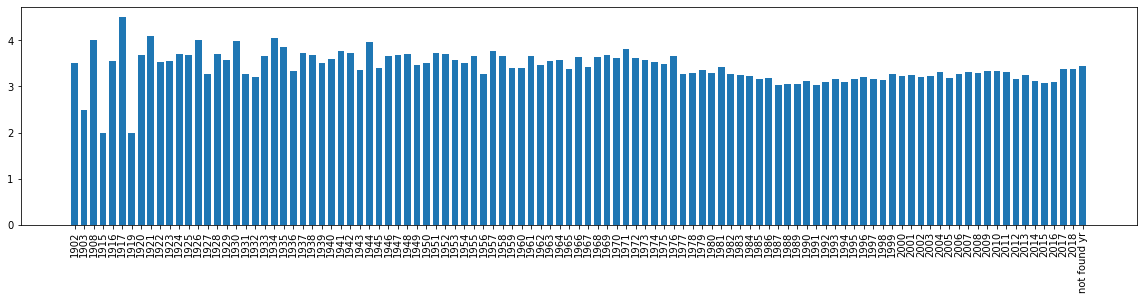

In [80]:
def title_to_year(title):
  capture_regex = '(?<=[(])\d{4}(?=[)]$)'
  year = re.search(capture_regex, str(title))
  return int(year.group()) if year else 'not found yr'


def plot_custom(index, values):
  fig, ax = plt.subplots()
  x = np.arange(len(index))
  ax.set_xticks(x)
  ax.set_xticklabels(index, rotation=90)
  genres_bar = ax.bar(x, values, width=0.7)
  plt.gcf().set_size_inches(20, 4)
  plt.show()


movies_with_avgs[['title','rating']]
movies_with_avgs['title'] = movies_with_avgs['title'].map(lambda x: title_to_year(x))
movies_with_avgs = movies_with_avgs.groupby('title')['rating'].mean()
plot_custom(movies_with_avgs.index, movies_with_avgs.values)